### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.decomposition import PCA
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from scipy.stats import loguniform
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import pickle 

#### Q1 A -Import ‘signal-data.csv’ as DataFrame

In [2]:
df = pd.read_csv('C:\\Users\\Sai\\Desktop\\GL\\Project5\\SignalData.csv')

In [3]:
df.shape

(1567, 592)

#### Q1 B -Print 5 point summary and share at least 2 observations.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


#### Observations
<li> We could easily identify the outliers from the 25 percentile and 75 percentile data.
<li> Min, 25%, 75% and max values of the features can provide the additional information about the variance. 
<li> From Mean data, we could identify the middle value of each feature

#### Q2 A -Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [5]:
df = df.replace(r'^\s*$', np.nan, regex=True)
missing_values = ["?","-",""]
ndfnew = df.replace(missing_values, np.nan)
for col in ndfnew:
    avg_nan = round(ndfnew[col].isna().mean()*100, 1)
    if avg_nan > 20.0 :
        ndfnew.drop(col,axis=1, inplace = True)
column_count = ndfnew.count(axis = 0)
print(column_count)

Time         1567
0            1561
1            1560
2            1553
3            1553
             ... 
586          1566
587          1566
588          1566
589          1566
Pass/Fail    1567
Length: 560, dtype: int64


In [6]:
ndfnew.mean()
ndfnew.fillna(ndfnew.mean(), inplace=True)
ndfnew

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


#### Q2 B -Identify and drop the features which are having same value for all the rows.

In [7]:
df1 = ndfnew.loc[:,ndfnew.apply(pd.Series.nunique) != 1]
df1

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.433300,-0.006100,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.462862,-0.000841,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.462200,-0.007200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


#### Q2 C -Drop other features if required using relevant functional knowledge. Clearly justify the same.

In [8]:
df1.drop(columns = ['Time'], axis = 0, inplace = True)
df1

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.500500,0.016200,-0.003400,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.496600,-0.000500,-0.014800,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.443600,0.004100,0.001300,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.488200,-0.012400,-0.003300,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.503100,-0.003100,-0.007200,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.342400,-0.004500,-0.005700,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.433300,-0.006100,-0.009300,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.462862,-0.000841,0.000146,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.462200,-0.007200,0.003200,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,-1


In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.8400,3056.5400,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.9100,2538.7450,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.9556,2218.0555,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.3538,1590.1699,3715.0417
4,1567.0,4.197013,56.103066,0.6815,1.01770,1.3171,1.5296,1114.5366
...,...,...,...,...,...,...,...,...
586,1567.0,0.021458,0.012354,-0.0169,0.01345,0.0205,0.0276,0.1028
587,1567.0,0.016475,0.008805,0.0032,0.01060,0.0148,0.0203,0.0799
588,1567.0,0.005283,0.002866,0.0010,0.00330,0.0046,0.0064,0.0286
589,1567.0,99.670066,93.861936,0.0000,44.36860,72.0230,114.7497,737.3048


In [10]:
sd = df1.std(axis=0)
sd

0             73.480613
1             80.227793
2             29.380932
3            439.712852
4             56.103066
                ...    
586            0.012354
587            0.008805
588            0.002866
589           93.861936
Pass/Fail      0.498010
Length: 443, dtype: float64

In [11]:
for col in df1:
    sd = df1.std()
    threshold = 0.1
    df1.drop(sd[sd < threshold].index.values, axis=1, inplace = True)
print(df1)        

            0        1          2          3       4         6          12  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.439600   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.547000   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.017900   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.848200   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.942400   
...       ...      ...        ...        ...     ...       ...         ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  203.986700   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  204.017300   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  199.956809   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  197.244800   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  199.956809   

             14          15         16  ...       570     571  

In [12]:
df1.std()

0             73.480613
1             80.227793
2             29.380932
3            439.712852
4             56.103066
                ...    
576           16.921369
577           12.485267
585            3.576891
589           93.861936
Pass/Fail      0.498010
Length: 297, dtype: float64

#### Justifications
<li> Removed all the columns which is having Standard Deviation 1. Because it is highly correlated columns.
<li> Time in the DataFrame is dropped because it has no impact in the DataSet.

#### Q2 D -Check for multi-collinearity in the data and take necessary action.

In [13]:
X_multi = df1.drop('Pass/Fail',axis=1)     
y_multi = df1['Pass/Fail']     
print(X_multi)
print(y_multi)

            0        1          2          3       4         6          12  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.439600   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.547000   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.017900   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.848200   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.942400   
...       ...      ...        ...        ...     ...       ...         ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843   82.2467  203.986700   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763   98.4689  204.017300   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236   99.4122  199.956809   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726   98.7978  197.244800   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978   85.1011  199.956809   

             14          15         16  ...        569       57

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X_multi, thresh=10.0):
    variables = list(range(X_multi.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X_multi.iloc[:, variables].values, ix)
               for ix in range(X_multi.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X_multi.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X_multi.columns[variables])
    df2 = pd.DataFrame(X_multi.iloc[:, variables])
    return X_multi.iloc[:, variables], df2

In [15]:
X_multi2, df3 = calculate_vif_(X_multi, thresh=10.0)

dropping '74' at index: 53
dropping '209' at index: 118
dropping '347' at index: 166
dropping '70' at index: 51
dropping '50' at index: 38
dropping '275' at index: 129
dropping '12' at index: 6
dropping '46' at index: 34
dropping '37' at index: 26
dropping '204' at index: 109
dropping '66' at index: 44
dropping '148' at index: 72
dropping '43' at index: 30
dropping '34' at index: 23
dropping '187' at index: 94
dropping '152' at index: 72
dropping '268' at index: 112
dropping '469' at index: 207
dropping '60' at index: 36
dropping '124' at index: 54
dropping '45' at index: 30
dropping '183' at index: 87
dropping '207' at index: 100
dropping '252' at index: 105
dropping '175' at index: 82
dropping '427' at index: 169
dropping '138' at index: 63
dropping '123' at index: 52
dropping '475' at index: 202
dropping '38' at index: 25
dropping '36' at index: 24
dropping '32' at index: 21
dropping '44' at index: 26
dropping '283' at index: 106
dropping '61' at index: 31
dropping '547' at index: 2

In [16]:
X_multi2.shape

(1567, 85)

In [17]:
df3.shape

(1567, 85)

In [18]:
df3['Pass/Fail'] = y_multi

In [19]:
df3.shape

(1567, 86)

In [20]:
df3.head(5)

,23,24,40,41,59,96,98,129,140,151,...,549,554,559,568,569,573,574,585,589,Pass/Fail
0,-4043.75,751.00,61.29,4.515,-1.7264,-0.2786,0.3974,-0.0473,0.3948,10.284,...,0.4234,0.3363,0.4385,2.452417,21.117674,0.3157,3.0624,2.3630,99.670066,-1
1,-3498.75,-1640.25,78.25,2.773,0.8073,0.5854,-0.9353,-0.0946,0.2301,13.077,...,0.7193,0.4989,0.1745,2.452417,21.117674,0.2653,2.0111,4.4447,208.204500,-1
2,-4047.00,-1916.50,14.37,5.434,23.8245,-0.1343,-0.1427,-0.1892,0.3263,8.443,...,0.1832,0.3752,0.3718,0.411900,68.848900,0.1882,4.0923,3.1745,82.860200,1
3,-4515.00,-1657.25,76.90,1.279,24.3791,0.0411,0.0177,0.2838,0.1915,15.241,...,1.8804,17.4781,0.7288,2.729000,25.036300,0.1738,2.8971,2.0544,73.843200,-1
4,-3987.50,117.00,76.39,2.209,-12.2945,0.2189,-0.6704,-0.5677,0.3744,12.506,...,1.0388,0.8311,0.2156,2.452417,21.117674,0.2224,3.1776,99.3032,73.843200,-1


#### Q2 E -Make all relevant modifications on the data using both functional/logical reasoning/assumptions.
<li> We could not identify the behaviour of the DataSet, if it has more Null values. So, it is necessary to remove 20%+ of Null value feature and remaining Null value are replaced with mean.
<li> It is necessary to remove the features which are having the same value on all the rows to avoid overfitting of the model.
<li> Removed all the columns which is having Standard Deviation 1. Because it is highly correlated columns.
<li> Time in the DataFrame is dropped because it has no impact in the DataSet.
<li> To identify and drop the multi colinearity features, I used VIF algorithm. 

#### Q3 A -Perform a detailed univariate Analysis with appropriate detailed comments after each analysis

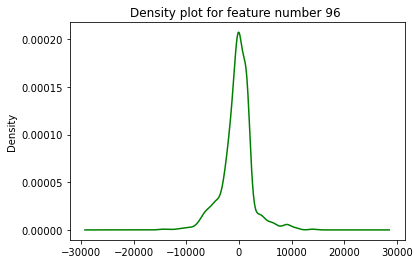

In [21]:
df3['24'].plot.density(color='green')
plt.title('Density plot for feature number 96 ')
plt.show()

#### Comments
<li> For feature 96, the values are spreaded between -10000 to 10000.

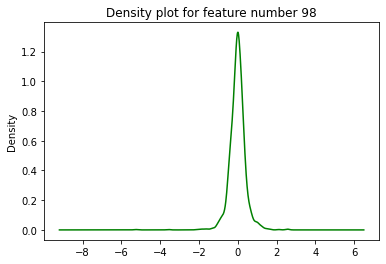

In [22]:
df3['98'].plot.density(color='green')
plt.title('Density plot for feature number 98')
plt.show()

#### Comments
<li> Feature 98, the high data density distribution is between -1 to 1

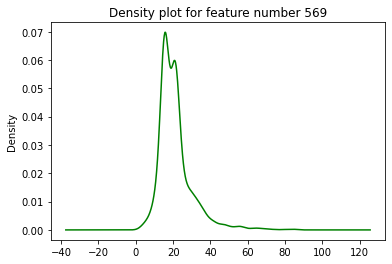

In [23]:
df3['569'].plot.density(color='green')
plt.title('Density plot for feature number 569')
plt.show()

#### Comments
<li> The 569 th feature, the high data distribution is from 0 to 40
<li> Since all the features are represented in different scale. Therefore we need to do standardization.    

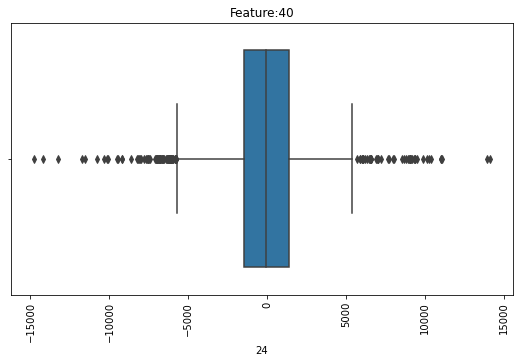

In [24]:
plt.figure(figsize=(9,5))
sns.boxplot(df3['24'])
plt.xticks(rotation=90)
plt.title('Feature:40')
plt.show()

#### Comments
<li> From the above box plot(Feature 40), we could see so many outliers. Therefore EDA we need to use for handiling the outliers.

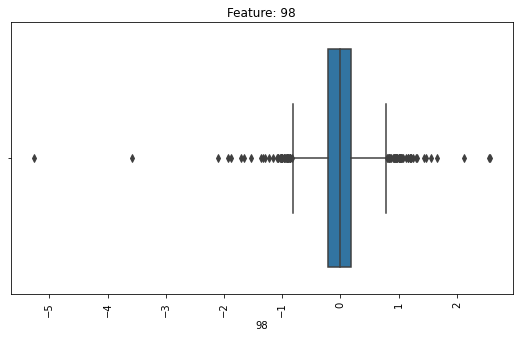

In [25]:
plt.figure(figsize=(9,5))
sns.boxplot(df3['98'])
plt.xticks(rotation=90)
plt.title('Feature: 98')
plt.show()

#### Comments
<li> Feature 98 also having many outliers as shown in the above boxplot.

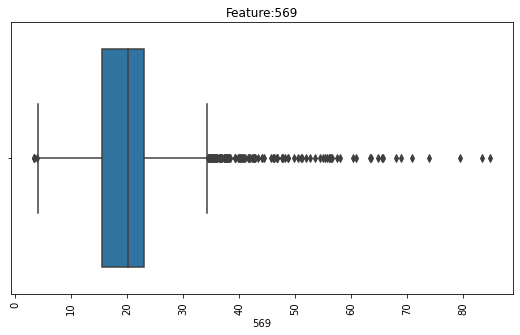

In [26]:
plt.figure(figsize=(9,5))
sns.boxplot(df3['569'])
plt.xticks(rotation=90)
plt.title('Feature:569')
plt.show()

#### Comments
<li> Feature 569 is right skewed as shown in the above figure.

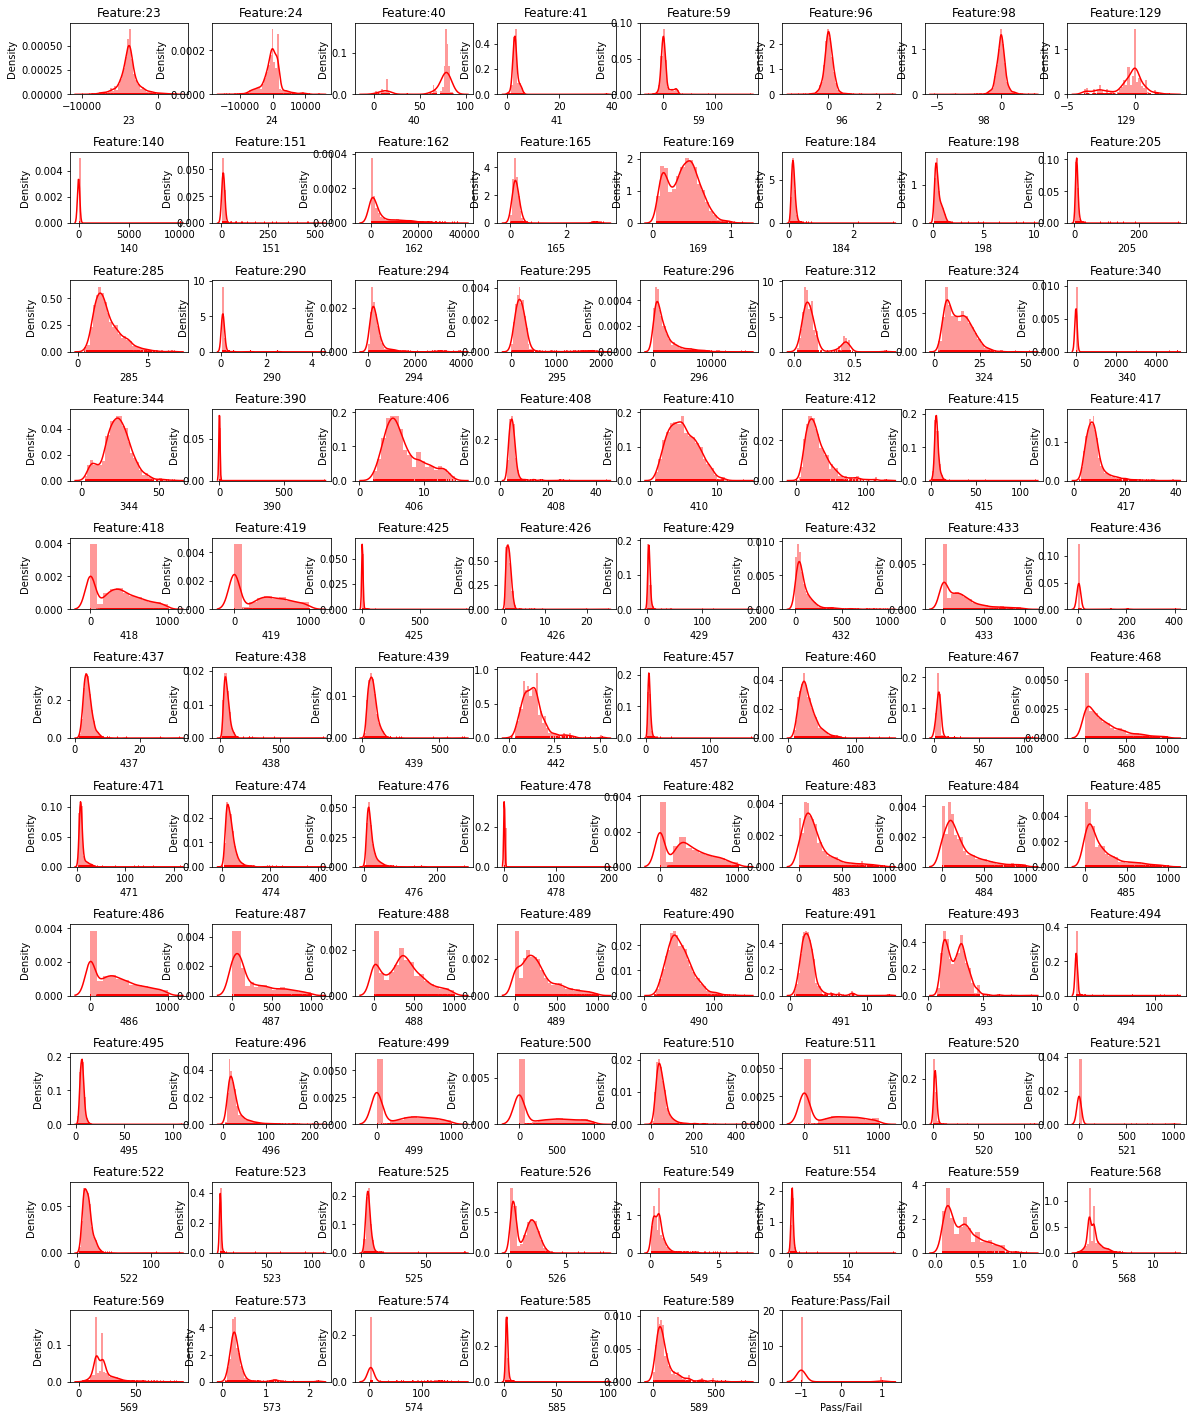

In [27]:
plt.figure(figsize=(20,25))
col = 1
for i in df3.columns:
    plt.subplot(11, 8, col)
    plt.title('Feature:' +i)
    plt.subplots_adjust(hspace=0.8)
    sns.distplot(df3[i], color = 'r', rug = True)
    col += 1 

#### Comments
<li> Density distribution of each feature is different. Hence we need to do standardization of the data to create a model.

#### Q3 B -Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

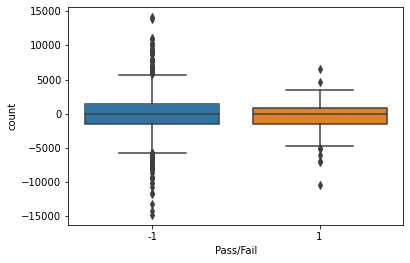

In [28]:
sns.boxplot(x='Pass/Fail',y='24',data=df3)
sns.countplot(x='Pass/Fail',data=df3)
plt.show()

#### Comments
<li> From the above plot, we can understand that the output feature(Pass/Fail) is imbalanced. Therefore we need to use the balancing technique.

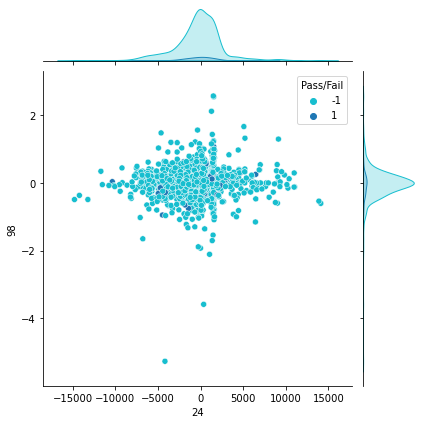

In [29]:
sns.jointplot(data = df3, x='24', y='98', hue='Pass/Fail', 
              kind='scatter', height=6, ratio=5, space=0.2, palette='tab10_r')
plt.show()

#### Comments
<li> From the above joint plot, the Features 24 and 96 is used to find out the pass fail distribution. From the plot, the pass distribution is highwer than the failure.

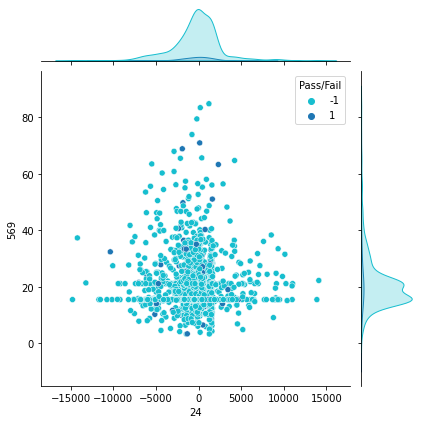

In [30]:
sns. jointplot(x="24", y="569", hue="Pass/Fail", data=df3, palette='tab10_r');
plt.show()

#### Comments
<li> As per the previous plot, the above plot(plotted between 24 and 96) also showing more pass counts. 

#### Q4 A -Segregate predictors vs target attributes

In [31]:
x = df3.drop('Pass/Fail',axis=1)     
y = df3['Pass/Fail']     
print(x)
print(y)

           23       24     40     41       59      96      98       129  \
0    -4043.75   751.00  61.29  4.515  -1.7264 -0.2786  0.3974 -0.047300   
1    -3498.75 -1640.25  78.25  2.773   0.8073  0.5854 -0.9353 -0.094600   
2    -4047.00 -1916.50  14.37  5.434  23.8245 -0.1343 -0.1427 -0.189200   
3    -4515.00 -1657.25  76.90  1.279  24.3791  0.0411  0.0177  0.283800   
4    -3987.50   117.00  76.39  2.209 -12.2945  0.2189 -0.6704 -0.567700   
...       ...      ...    ...    ...      ...     ...     ...       ...   
1562 -6228.25   356.00  81.21  1.427   2.8182 -0.0382  0.0730  0.000000   
1563 -3675.50   339.00  79.43  2.945  -3.3555 -0.0821  0.4289 -0.141900   
1564 -4102.00 -1226.00  82.03  2.863   1.1664  0.2516 -0.4311 -0.554228   
1565 -4001.50   394.75  81.13  2.067   4.4682 -0.0926 -0.1023 -0.993400   
1566 -3951.75  -425.00  80.45  2.741   1.8718 -0.0728  0.0291 -0.554228   

         140        151  ...     526     549      554     559       568  \
0     0.3948  10.284000 

In [32]:
x.shape

(1567, 85)

In [33]:
y.shape

(1567,)

#### Q4 B -Check for target balancing and fix it iffound imbalanced

In [34]:
print(display(df3['Pass/Fail'].value_counts()))

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

None


In [35]:
print("Before UpSampling, counts of label '-1': {}".format(sum(y==-1)))
print("Before UpSampling, counts of label '1': {} \n".format(sum(y==1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x_res, y_res = sm.fit_resample(x, y.ravel())

print("After UpSampling, counts of label '-1': {}".format(sum(y_res==-1)))
print("After UpSampling, counts of label '1': {} \n".format(sum(y_res==1)))

print('After UpSampling, the shape of x_res: {}'.format(x_res.shape))
print('After UpSampling, the shape of y_res: {} \n'.format(y_res.shape))

Before UpSampling, counts of label '-1': 1463
Before UpSampling, counts of label '1': 104 

After UpSampling, counts of label '-1': 1463
After UpSampling, counts of label '1': 1463 

After UpSampling, the shape of x_res: (2926, 85)
After UpSampling, the shape of y_res: (2926,) 



#### Q4 C -Perform train-test split and standardize the data or vice versa if required.

In [36]:
x_z= stats.zscore(x_res)
x_z

,23,24,40,41,59,96,98,129,140,151,...,526,549,554,559,568,569,573,574,585,589
0,-0.180706,0.435630,-0.172705,0.622737,-0.774033,-1.542576,1.223071,0.288655,-0.037122,-0.113246,...,-1.022160,-0.396757,-0.303853,0.536457,-0.043405,-0.112411,-0.053399,-0.204842,-0.261611,0.007340
1,0.230439,-0.508748,0.561947,-0.331245,-0.507867,3.020063,-2.512675,0.242191,-0.037568,0.009135,...,-0.583842,0.087190,-0.104299,-0.850134,-0.043405,-0.112411,-0.309662,-0.253980,0.506074,1.325659
2,-0.183158,-0.617848,-2.205129,1.126015,1.910101,-0.780552,-0.290905,0.149263,-0.037307,-0.193913,...,-0.860815,-0.789607,-0.256112,0.186133,-2.520218,4.867826,-0.701684,-0.156705,0.037652,-0.196842
3,-0.536214,-0.515462,0.503470,-1.149414,1.968362,0.145706,0.158718,0.613902,-0.037672,0.103955,...,-0.749956,1.986180,20.733738,2.061181,0.292316,0.296455,-0.774902,-0.212569,-0.375416,-0.306367
4,-0.138271,0.185244,0.481378,-0.640112,-1.884217,1.084638,-1.770123,-0.222546,-0.037177,-0.015885,...,0.968998,0.609735,0.303399,-0.634267,-0.043405,-0.112411,-0.527791,-0.199458,35.487783,-0.306367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,0.180604,-0.270806,-1.395743,0.575217,0.437314,-0.106494,0.426441,0.386855,-0.037495,0.124827,...,0.421197,-0.197905,0.051969,-0.749961,-0.566735,-0.106001,0.276561,-0.184354,-0.131667,-0.752340
2922,-0.567333,0.164576,0.656358,-0.543172,-0.683919,0.680690,-0.973157,-0.241360,-0.037618,-0.069405,...,-1.201258,-0.314447,-0.056304,-1.298258,1.894677,4.396609,-0.085939,-0.222075,0.175995,-1.107692
2923,0.320191,0.696913,-1.540151,0.695918,-0.047907,-0.473384,0.203944,0.298995,-0.037827,-0.188283,...,-0.705258,-0.796142,-0.249581,0.389643,0.161301,-0.808033,-0.718099,-0.248517,-0.087028,0.181619
2924,0.412171,0.010222,-0.011293,0.433465,1.171657,-0.121269,0.408808,-0.207782,-0.037500,-0.062636,...,0.535979,0.199256,-0.266345,-1.348115,0.401159,-0.356679,0.496993,-0.201296,-0.421749,-0.230874


In [37]:
y_z= stats.zscore(y_res)
y_z

array([-1., -1.,  1., ...,  1.,  1.,  1.])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_z, y_z,
    test_size=0.2, shuffle = True, random_state = 8)

# Validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.20, random_state= 8) 

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (1872, 85)
X_test shape: (586, 85)
y_train shape: (1872,)
y_test shape: (586,)
X_val shape: (468, 85)
y_val shape: (468,)


#### Q4 D -Check if the train and test data have similar statistical characteristics when compared with original data.

In [39]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
23,1872.0,0.007955,0.988464,-4.026418,-0.453139,-0.028523,0.334686,4.359992
24,1872.0,0.007039,0.995882,-5.707713,-0.399960,0.112135,0.597353,5.709928
40,1872.0,-0.002713,0.993807,-2.765475,-0.023941,0.511881,0.603531,0.902850
41,1872.0,-0.004842,0.805763,-1.740149,-0.358250,-0.129715,0.247663,18.894625
59,1872.0,-0.009773,1.029162,-2.692916,-0.670749,-0.281234,0.520635,17.071088
...,...,...,...,...,...,...,...,...
569,1872.0,0.015422,1.025358,-1.976668,-0.702081,-0.119226,0.313806,6.532401
573,1872.0,0.015905,1.065356,-1.319461,-0.479298,-0.173141,0.172865,9.510706
574,1872.0,0.018579,1.039810,-0.299393,-0.226877,-0.206751,-0.184674,6.983576
585,1872.0,0.016835,1.220313,-0.659338,-0.268267,-0.106270,0.093494,35.487783


In [40]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
23,586.0,-0.078062,1.030712,-4.664070,-0.567529,-0.052128,0.266463,4.652508
24,586.0,-0.027448,0.973967,-4.415402,-0.468873,0.074920,0.548898,4.186582
40,586.0,-0.007739,1.029837,-2.735500,-0.036286,0.524890,0.609596,0.853469
41,586.0,0.062677,1.647407,-1.835657,-0.358490,-0.161061,0.175318,18.894625
59,586.0,0.018070,0.950806,-3.637898,-0.610267,-0.263004,0.521403,3.530968
...,...,...,...,...,...,...,...,...
569,586.0,-0.067122,0.889770,-1.972452,-0.702081,-0.140032,0.103645,4.795522
573,586.0,-0.010433,0.903628,-1.254930,-0.458690,-0.178467,0.194241,9.510706
574,586.0,-0.041591,0.920397,-0.274831,-0.228249,-0.209455,-0.184740,6.296614
585,586.0,-0.026209,0.369325,-0.691422,-0.278416,-0.095188,0.106233,1.868775


In [41]:
X_val.describe().T

,count,mean,std,min,25%,50%,75%,max
23,468.0,0.065924,1.003965,-3.735348,-0.378398,-0.020302,0.355762,4.595174
24,468.0,0.006211,1.050019,-4.483757,-0.409712,0.142012,0.650673,4.475967
40,468.0,0.020542,0.989696,-2.735500,0.004069,0.521411,0.599227,0.853469
41,468.0,-0.059110,0.506074,-1.891406,-0.365746,-0.151424,0.175017,1.572887
59,468.0,0.016467,0.942603,-1.849939,-0.667475,-0.257517,0.607806,2.402788
...,...,...,...,...,...,...,...,...
569,468.0,0.022358,1.026885,-1.899891,-0.702081,-0.112411,0.343829,5.970535
573,468.0,-0.050555,0.831699,-1.319461,-0.488304,-0.165514,0.214006,9.510706
574,468.0,-0.022239,0.931947,-0.267526,-0.228140,-0.207707,-0.184345,7.598783
585,468.0,-0.034522,0.353897,-0.629025,-0.261086,-0.108025,0.090644,2.224209


#### Comments
<li> The Max values for Train, test and val data became almost similar(e.g. Feature 23: Train Max - 4.359992, Test Max - 4.652508, val Max - 4.595174)
<li> Similarly standard diviation values also became almose similar. 
    

#### Q5 A -Use any Supervised Learning technique to train a model

In [42]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)

predicted_labels_test = regressor.predict(X_test)
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

1.0
0.4811319655610312


#### Q5 B -Use cross validation techniques

In [43]:
num_folds = 50
kfold = KFold(n_splits=num_folds)
model = LogisticRegression()
results = cross_val_score(model, x_z, y_z, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.088% (12.592%)


In [44]:
cv = LeaveOneOut()
model = LogisticRegression()
scores = cross_val_score(model, x_z, y_z, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

Accuracy: 78.776% (40.889%)


In [45]:
model = RidgeCV()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x_z, y_z, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_RidgeCV = absolute(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores_RidgeCV.mean()*100.0, scores_RidgeCV.std()*100.0))

Accuracy: 72.124% (2.436%)


In [46]:
model = Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x_z, y_z, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores_Lasso = absolute(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores_Lasso.mean()*100.0, scores_Lasso.std()*100.0))

Accuracy: 100.039% (0.045%)


In [47]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)

parameters = {'alpha':[1, 10]}

model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X_train,y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(X_train,y_train)
y_pred_rf_1 = Ridge_reg.predict(X_test)

print("R2 score : " , r2_score(y_test,y_pred_rf_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(y_test, y_pred_rf_1)))
print("Mean square error: ",mean_squared_error(y_test, y_pred_rf_1))
print("Mean absolute error: ",mean_absolute_error(y_test, y_pred_rf_1))


Ridge(alpha=10)
R2 score :  0.24470858554878994
Root Mean square error:  0.8689940436841422
Mean square error:  0.7551506479585168
Mean absolute error:  0.73279290589296


In [48]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)

parameters = {'alpha':[1, 10]}

model = Ridge()

# define the grid search
Ridge_Rand= RandomizedSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_Rand.fit(X_train,y_train)

# best estimator
print(Ridge_Rand.best_estimator_)

# best model
best_model_Rand = Ridge_Rand.best_estimator_
best_model_Rand.fit(X_train,y_train)
y_pred_Rand = Ridge_Rand.predict(X_test)

print("R2 score : " , r2_score(y_test,y_pred_Rand))
print("Root Mean square error: ",np.sqrt(mean_squared_error(y_test, y_pred_Rand)))
print("Mean square error: ",mean_squared_error(y_test, y_pred_Rand))
print("Mean absolute error: ",mean_absolute_error(y_test, y_pred_Rand))

Ridge(alpha=10)
R2 score :  0.24470858554878994
Root Mean square error:  0.8689940436841422
Mean square error:  0.7551506479585168
Mean absolute error:  0.73279290589296


#### Comments
<li> I have taken K-Fold for proceed further. Because it has data coverage of 76.088% with standard deviation of (12.592%).
<li> Leave one out is not preferable
    

#### Q5 C -Apply hyper-parameter tuning techniques to get the best accuracy.

#### GridSearchCV - RandomForestRegressor

In [49]:
skf = KFold(n_splits=5)
RF_model_3 = RandomForestRegressor()
params = {"n_estimators": np.arange(10,16,2),"max_depth": np.arange(5, 9,1),
          "max_features":np.arange(5,8,1),'min_samples_leaf': range(4, 12, 2),
    'min_samples_split': range(20, 26, 2)}

RF_GV_1 = GridSearchCV(estimator = RF_model_3, param_grid = params,cv=skf,verbose=1,return_train_score=True)
RF_GV_1.fit(X_train, y_train)

best_score_rf = RF_GV_1.best_score_
best_rf = RF_GV_1.best_params_
best_rf

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


{'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'n_estimators': 12}

In [119]:
rf_best = RandomForestRegressor(max_depth= 8, max_features= 7,n_estimators=12,min_samples_leaf=4,min_samples_split=20)
rf_best_fit = rf_best.fit(X_train, y_train)

# predict
y_pred_rf_1 = rf_best.predict(X_test)

score_RF1 = cross_val_score(rf_best, X_train, y_train, cv = 5).mean()
print(score_RF1)

0.5817488666431507


#### GridSearchCV - LogisticRegression

In [51]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

y_pred_LR1 = grid_search.predict(X_test)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.793628 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [123]:
model = LogisticRegression()
solvers = ['newton-cg']
penalty = ['l2']
c_values = [100]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
LR_best_fit = grid_search.fit(X_train, y_train)

score_LR = cross_val_score(LR_best_fit, X_train, y_train, cv = 5).mean()
print(score_LR)

# predict
y_pred_LR2 = LR_best_fit.predict(X_test)

0.7932549019607844


#### GridSearchCV - GradientBoostingRegressor

In [53]:
GB_model_3=GradientBoostingRegressor()
params = {"n_estimators": [130,140,2],"learning_rate":[0.09,0.1],"max_depth": np.arange(8, 14,2),
          "max_features":np.arange(3,8,1),'min_samples_leaf': range(14, 20, 2)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
GB_GV_1 = GridSearchCV(estimator = GB_model_3, param_grid = params,cv=cv,verbose=1,return_train_score=True)
GB_GV_1.fit(X_train,y_train) 

#parameters best value
best_score_rf = GB_GV_1.best_score_
best_gb = GB_GV_1.best_params_
best_gb

Fitting 30 folds for each of 270 candidates, totalling 8100 fits


{'learning_rate': 0.1,
 'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 16,
 'n_estimators': 140}

In [124]:
gb_best = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 140,max_depth= 12, 
                                           max_features= 5,min_samples_leaf=16)

GB_best_fit = gb_best.fit(X_train, y_train)

# predict
y_pred_gb_1 = GB_best_fit.predict(X_test)

score_GB = cross_val_score(GB_best_fit, X_train, y_train, cv = 5).mean()
print(score_GB)

0.8474065853751117


#### XGBRegressor

In [55]:
XGB_model_3=XGBRegressor(objective='reg:squarederror')
params1 = {
    "colsample_bytree": [i/100.0 for i in range(48,54,1)],
    "learning_rate": [0.2,0.22,0.24], 
    "n_estimators": [174,184,2],
    "subsample": [i/100.0 for i in range(74,78,1)]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
XGB_GV_3 = GridSearchCV(estimator = XGB_model_3, param_grid = params1, 
                        cv=cv,
                        verbose = 1,
                       return_train_score=True) 
XGB_GV_3.fit(X_train,y_train) 

# results of grid search CV
XGB_results_3 = pd.DataFrame(XGB_GV_3.cv_results_)

#parameters best value
best_score_xgb_3 = XGB_GV_3.best_score_
best_xgb_3 = XGB_GV_3.best_params_
best_xgb_3

Fitting 30 folds for each of 216 candidates, totalling 6480 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'n_estimators': 184,
 'subsample': 0.74}

In [125]:
xgb_best_3 = XGBRegressor(colsample_bytree=0.5,learning_rate=0.2,n_estimators=184,subsample=0.74,objective='reg:squarederror')
XGB_best_fit = xgb_best_3.fit(X_train, y_train)

# predict
y_pred_xgb_3 = XGB_best_fit.predict(X_test)

score_XGB = cross_val_score(XGB_best_fit, X_train, y_train, cv = 5).mean()
print(score_XGB)

0.8071536641880295


#### RandomizedSearchCV - Ridge

In [57]:
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_train, y_train)
scores_RandCV = result

print('Best Hyperparameters: %s' % scores_RandCV.best_params_)

Best Hyperparameters: {'alpha': 52.004418842705064, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


In [126]:
model_ridge = Ridge(solver = 'sag', alpha = 52.004418842705064,fit_intercept = True, normalize = False)
Ridge_best_fit = model_ridge.fit(X_train, y_train)

# predict
y_pred_Rand_4 = Ridge_best_fit.predict(X_test)

score_RS_CV = cross_val_score(Ridge_best_fit, X_train, y_train, cv = 5).mean()
print(score_RS_CV)

0.143946792726139


#### GradientBoostingRegressor - RandomizedSearch

In [59]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10)
                 }
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = cv, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)


 The best parameters across ALL searched params:
 {'learning_rate': 0.07253990903436469, 'max_depth': 6, 'n_estimators': 291, 'subsample': 0.16915897597931195}


In [127]:
model_GBR = GradientBoostingRegressor(learning_rate = 0.07253990903436469,subsample = 0.16915897597931195, 
                                      n_estimators = 291, max_depth = 6)
GBR_best_fit = model_GBR.fit(X_train, y_train)

# predict
y_pred_GBR = GBR_best_fit.predict(X_test)

score_GBR_CV = cross_val_score(GBR_best_fit, X_train, y_train, cv = 5).mean()
print(score_GBR_CV)

0.8101422908818042


#### Q5 D -Use any other technique/method which can enhance the model performance

In [61]:
covMatrix = np.cov(x_z,rowvar=False)
print(covMatrix)

[[ 1.00034188  0.00344376 -0.01477923 ...  0.0785797   0.00729252
  -0.05695201]
 [ 0.00344376  1.00034188  0.0421981  ... -0.02525818 -0.02175865
  -0.04673661]
 [-0.01477923  0.0421981   1.00034188 ...  0.02359179 -0.0125584
  -0.06044331]
 ...
 [ 0.0785797  -0.02525818  0.02359179 ...  1.00034188 -0.01006146
  -0.02411066]
 [ 0.00729252 -0.02175865 -0.0125584  ... -0.01006146  1.00034188
  -0.0060635 ]
 [-0.05695201 -0.04673661 -0.06044331 ... -0.02411066 -0.0060635
   1.00034188]]


In [62]:
pca85 = PCA(n_components=85)
pca85.fit(x_z)
print(pca85.components_)
print(pca85.explained_variance_ratio_)
Xpca85 = pca85.transform(x_z)

[[ 1.57324848e-01  3.90622951e-02 -9.92908056e-02 ... -1.59464477e-02
   1.61236283e-02  7.08728480e-02]
 [-9.94202231e-02 -2.33279585e-02  4.74761377e-03 ...  4.04662870e-03
   1.51343872e-02  1.19190123e-02]
 [ 1.57307275e-01 -1.06045813e-01  7.83161374e-02 ...  4.16238137e-02
   2.89452060e-03 -4.94844140e-02]
 ...
 [ 5.54168276e-03 -8.26915298e-04  6.51562235e-04 ...  8.38681241e-02
   9.54261245e-03 -2.23148688e-02]
 [ 3.31947114e-03 -7.52223931e-03 -6.00527707e-03 ... -3.53507368e-03
  -1.81019392e-02 -1.72727641e-02]
 [-1.96711835e-02  1.01504239e-02  3.43992037e-03 ... -8.68538349e-03
  -9.85316949e-03 -4.47307128e-05]]
[0.05562376 0.04924538 0.03671201 0.02732136 0.02517999 0.02411578
 0.02213377 0.02140601 0.02062642 0.02022158 0.01952449 0.01876844
 0.01830848 0.01763169 0.01738886 0.01723102 0.01636107 0.01615512
 0.01565153 0.01533456 0.01501176 0.01464236 0.01442793 0.01417997
 0.01378549 0.01319335 0.01291441 0.0127275  0.01255875 0.01236843
 0.01212881 0.01200411 0.0119

#### Comments
<li> To achive 90% of data coverage, we need to choose n_components = 85. Else we will get only ~40% of data coverage. So, I'm assuming that all the 85 features are important to proceed further.

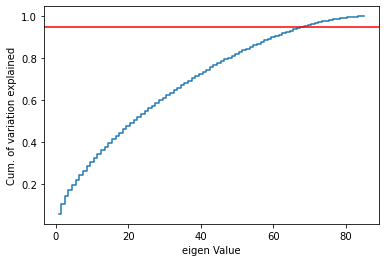

In [63]:
plt.step(list(range(1,86)),np.cumsum(pca85.explained_variance_ratio_), where='mid')
plt.ylabel('Cum. of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y = 0.95, color = 'r', linestyle = '-')
plt.show()

In [64]:
pca60 = PCA(n_components=70)
pca60.fit(x_z)
print(pca60.components_)
print(pca60.explained_variance_ratio_)
Xpca60 = pca60.transform(x_z)

[[ 1.57324848e-01  3.90622951e-02 -9.92908056e-02 ... -1.59464477e-02
   1.61236283e-02  7.08728480e-02]
 [-9.94202231e-02 -2.33279585e-02  4.74761377e-03 ...  4.04662870e-03
   1.51343872e-02  1.19190123e-02]
 [ 1.57307275e-01 -1.06045813e-01  7.83161374e-02 ...  4.16238137e-02
   2.89452060e-03 -4.94844140e-02]
 ...
 [ 1.03274419e-01  8.67935458e-02 -2.35292889e-01 ...  3.60219650e-02
  -9.73374344e-05 -4.12355261e-02]
 [ 1.76255755e-01 -1.28736978e-01 -2.25586079e-01 ... -3.14554631e-02
   6.94017496e-03 -5.49434454e-02]
 [ 6.96487559e-02  7.10312287e-02  8.62689706e-03 ... -4.52615221e-02
  -3.82668767e-02  1.74624296e-02]]
[0.05562376 0.04924538 0.03671201 0.02732136 0.02517999 0.02411578
 0.02213377 0.02140601 0.02062642 0.02022158 0.01952449 0.01876844
 0.01830848 0.01763169 0.01738886 0.01723102 0.01636107 0.01615512
 0.01565153 0.01533456 0.01501176 0.01464236 0.01442793 0.01417997
 0.01378549 0.01319335 0.01291441 0.0127275  0.01255875 0.01236843
 0.01212881 0.01200411 0.0119

In [65]:
print(Xpca60)

[[ 0.36998371 -0.37862807 -1.61398325 ... -0.23303877  0.30015811
  -0.30181016]
 [-0.88701751  0.16754614 -0.96075103 ...  0.24192496 -0.70802553
   0.02382975]
 [ 0.84749969  0.87736139 -2.32774439 ... -0.75451634  0.23995891
  -0.56133446]
 ...
 [-0.39959021  0.85271613  0.40017657 ... -0.41442457  0.01085526
  -0.71827758]
 [ 0.05591779  0.74945011 -1.32988247 ... -0.31689277  0.27959955
  -0.15169437]
 [ 0.46445464 -0.51675685 -2.99943033 ...  0.38694229  0.31879122
   0.11325642]]


#### Q5 E -Display and explain the classification report in detail

In [86]:
import statsmodels.api as sm1
lm2=sm1.OLS(y_z,Xpca60).fit()
print(lm2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.326
Model:                            OLS   Adj. R-squared (uncentered):              0.309
Method:                 Least Squares   F-statistic:                              19.72
Date:                Sun, 29 Jan 2023   Prob (F-statistic):                   8.57e-193
Time:                        15:50:39   Log-Likelihood:                         -3575.0
No. Observations:                2926   AIC:                                      7290.
Df Residuals:                    2856   BIC:                                      7709.
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [128]:
RF_best_train_score = rf_best_fit.score(X_train,y_train)
RF_best_test_score = rf_best_fit.score(X_test,y_test)
RF_best_val_score = rf_best_fit.score(X_val,y_val)
print("RF Train accuracy : ", RF_best_train_score)
print("RF Test accuracy: ", RF_best_test_score )
print("RF Val accuracy: ", RF_best_val_score)

RF Train accuracy :  0.7707154335278528
RF Test accuracy:  0.624597066475918
RF Val accuracy:  0.6263269784267638


In [129]:
LR_best_train_score = LR_best_fit.score(X_train,y_train)
LR_best_test_score = LR_best_fit.score(X_test,y_test)
LR_best_val_score = LR_best_fit.score(X_val,y_val)
print("LR Train accuracy : ", LR_best_train_score)
print("LR Test accuracy: ", LR_best_test_score)
print("LR Val accuracy: ", LR_best_val_score)

LR Train accuracy :  0.8141025641025641
LR Test accuracy:  0.7627986348122867
LR Val accuracy:  0.7628205128205128


In [130]:
GB_best_train_score = GB_best_fit.score(X_train,y_train)
GB_best_test_score = GB_best_fit.score(X_test,y_test)
GB_best_val_score = GB_best_fit.score(X_val,y_val)
print("GB Train accuracy : ", GB_best_train_score)
print("GB Test accuracy: ", GB_best_test_score)
print("GB Val accuracy: ", GB_best_val_score)

GB Train accuracy :  0.9987231715589835
GB Test accuracy:  0.8581864270368108
GB Val accuracy:  0.8682707287641047


In [131]:
XGB_best_train_score = XGB_best_fit.score(X_train,y_train)
XGB_best_test_score = XGB_best_fit.score(X_test,y_test)
XGB_best_val_score = XGB_best_fit.score(X_val,y_val)
print("XGB Train accuracy: ", XGB_best_train_score)
print("XGB Test accuracy: ", XGB_best_test_score)
print("XGB Val accuracy: ", XGB_best_val_score)

XGB Train accuracy:  0.9999125393851797
XGB Test accuracy:  0.8161025227556317
XGB Val accuracy:  0.8316057559923408


In [132]:
Ridge_best_train_score = Ridge_best_fit.score(X_train,y_train)
Ridge_best_test_score = Ridge_best_fit.score(X_test,y_test)
Ridge_best_val_score = Ridge_best_fit.score(X_val,y_val)
print("RidgeCV Train accuracy: ", Ridge_best_train_score)
print("RidgeCV Test accuracy: ", Ridge_best_test_score)
print("RidgeCV Val accuracy: ", Ridge_best_val_score)

RidgeCV Train accuracy:  0.3903684851382272
RidgeCV Test accuracy:  0.2516443047480569
RidgeCV Val accuracy:  0.2478515676240154


In [133]:
GBR_best_train_score = GBR_best_fit.score(X_train,y_train)
GBR_best_test_score = GBR_best_fit.score(X_test,y_test)
GBR_best_val_score = GBR_best_fit.score(X_val,y_val)
print("GBR Train accuracy : ", GBR_best_train_score)
print("GBR Test accuracy: ", GBR_best_test_score)
print("GBR Val accuracy: ", GBR_best_val_score)

GBR Train accuracy :  0.9911388655246143
GBR Test accuracy:  0.8226309257619343
GBR Val accuracy:  0.840403628045869


In [135]:
pd.DataFrame([[RF_best_train_score, RF_best_test_score, RF_best_val_score], 
              [LR_best_train_score, LR_best_test_score, LR_best_val_score], 
              [GB_best_train_score, GB_best_test_score, GB_best_val_score], 
              [XGB_best_train_score, XGB_best_test_score, XGB_best_val_score], 
              [Ridge_best_train_score,Ridge_best_test_score, Ridge_best_val_score],
              [GBR_best_train_score,GBR_best_test_score, GBR_best_val_score]],
             index = ['RF_GridSearch', 'LR_GridSearch', 'GB_GridSearch','XGB_GridSearch',
                      'Ridge_RandomSearch', 'GB_RandomSearch' ], columns = ['Train Accuracy', 'Test Accuracy', 'validation Accuracy'])

,Train Accuracy,Test Accuracy,validation Accuracy
RF_GridSearch,0.770715,0.624597,0.626327
LR_GridSearch,0.814103,0.762799,0.762821
GB_GridSearch,0.998723,0.858186,0.868271
XGB_GridSearch,0.999913,0.816103,0.831606
Ridge_RandomSearch,0.390368,0.251644,0.247852
GB_RandomSearch,0.991139,0.822631,0.840404


#### Comments
<li> From the above table, we can clearly see that the GradiantBooster with GridSearchCV have almost equal accuracy for Train, Test and Validation set.
<li> Therefore GB_GridSearch model is the best option for this case.

#### Q5 F -Apply the above steps for all possible models that you have learnt so far.

In [68]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca60, y_z,
    test_size=0.2, shuffle = True, random_state = 8)

# Validation set
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca, 
    test_size=0.20, random_state= 8) 

print("X_train shape: {}".format(X_train_pca.shape))
print("X_test shape: {}".format(X_test_pca.shape))
print("y_train shape: {}".format(y_train_pca.shape))
print("y_test shape: {}".format(y_test_pca.shape))
print("X_val shape: {}".format(X_val_pca.shape))
print("y_val shape: {}".format(y_val_pca.shape))

X_train shape: (1872, 70)
X_test shape: (586, 70)
y_train shape: (1872,)
y_test shape: (586,)
X_val shape: (468, 70)
y_val shape: (468,)


#### GridSearchCV - RandomForestRegressor(PCA)

In [69]:
skf = KFold(n_splits=5)

RF_model_3 = RandomForestRegressor()

params = {"n_estimators": np.arange(10,16,2),"max_depth": np.arange(5, 9,1),
          "max_features":np.arange(5,8,1),'min_samples_leaf': range(4, 12, 2),
    'min_samples_split': range(20, 26, 2)}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

RF_GV_1 = GridSearchCV(estimator = RF_model_3, param_grid = params,cv=cv,verbose=1,return_train_score=True)

RF_GV_1.fit(X_train_pca, y_train_pca)

best_score_grid = RF_GV_1.best_score_
best_RF = RF_GV_1.best_params_
best_RF

Fitting 30 folds for each of 432 candidates, totalling 12960 fits


{'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'n_estimators': 14}

In [136]:
rf_best_pca = RandomForestRegressor(max_depth= 8, max_features= 7,n_estimators=14,min_samples_leaf=4,min_samples_split=20)

RF_best_fit_pca = rf_best_pca.fit(X_train_pca, y_train_pca)

# predict
y_pred_rf_pca = RF_best_fit_pca.predict(X_test_pca)

score_RF_pca = cross_val_score(RF_best_fit_pca, X_train, y_train, cv = 5).mean()
print(score_RF_pca)

0.6079615999639555


#### GridSearch - LogisticRegression(PCA)

In [71]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_pca = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_result_pca = grid_search_pca.fit(X_train_pca, y_train_pca)

y_pred_LR1 = grid_search_pca.predict(X_test_pca)

print("Best: %f using %s" % (grid_result_pca.best_score_, grid_result_pca.best_params_))

Best: 0.771000 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [137]:
model = LogisticRegression()
solvers = ['newton-cg']
penalty = ['l2']
c_values = [0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_pca = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
LR_best_fit_pca = grid_search_pca.fit(X_train_pca, y_train_pca)

score_LR_pca = cross_val_score(LR_best_fit_pca, X_train_pca, y_train_pca, cv = 5).mean()
print(score_LR_pca)

# predict
y_pred_LR2 = LR_best_fit_pca.predict(X_test_pca)

0.7681654188948307


#### GridSearch - GradientBoosting(PCA)

In [74]:
GB_model_3 = GradientBoostingRegressor()

params = {"n_estimators": [130,140,2],"learning_rate":[0.09,0.1],"max_depth": np.arange(8, 14,2),
          "max_features":np.arange(3,8,1),'min_samples_leaf': range(14, 20, 2)}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

GB_GV_1 = GridSearchCV(estimator = GB_model_3, param_grid = params,cv=cv,verbose=1,return_train_score=True)
GB_GV_1.fit(X_train_pca,y_train_pca) 

# results of grid search CV
GB_results = pd.DataFrame(GB_GV_1.cv_results_)
#parameters best value
best_score_rf = GB_GV_1.best_score_
best_gb = GB_GV_1.best_params_
best_gb

Fitting 30 folds for each of 270 candidates, totalling 8100 fits


{'learning_rate': 0.1,
 'max_depth': 12,
 'max_features': 4,
 'min_samples_leaf': 14,
 'n_estimators': 130}

In [138]:
gb_best_pca = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 130,max_depth= 12, 
                                           max_features= 5,min_samples_leaf=18)

GB_best_fit_pca = gb_best_pca.fit(X_train_pca, y_train_pca)

# predict
y_pred_gb_1 = GB_best_fit_pca.predict(X_test_pca)

score_gb_pca = cross_val_score(GB_best_fit_pca, X_train, y_train, cv = 5).mean()
print(score_gb_pca)

0.848969504269356


#### GridSearchCV - XGBoosting(PCA)

In [76]:
XGB_model_3=XGBRegressor(objective='reg:squarederror')
params1 = {
    "colsample_bytree": [i/100.0 for i in range(48,54,1)],
    "learning_rate": [0.2,0.22,0.24], 
    "n_estimators": [174,184,2],
    "subsample": [i/100.0 for i in range(74,78,1)]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

XGB_GV_3 = GridSearchCV(estimator = XGB_model_3, param_grid = params1, 
                        cv=cv,verbose = 1,return_train_score=True) 

XGB_GV_3.fit(X_train_pca,y_train_pca) 

# results of grid search CV
XGB_results_3 = pd.DataFrame(XGB_GV_3.cv_results_)

#parameters best value
best_score_xgb_3 = XGB_GV_3.best_score_
best_xgb_3 = XGB_GV_3.best_params_
best_xgb_3

Fitting 30 folds for each of 216 candidates, totalling 6480 fits


{'colsample_bytree': 0.52,
 'learning_rate': 0.2,
 'n_estimators': 184,
 'subsample': 0.76}

In [139]:
xgb_best_pca = XGBRegressor(colsample_bytree=0.53,learning_rate=0.2,n_estimators=174,subsample=0.75,objective='reg:squarederror')
XGB_best_fit_pca = xgb_best_pca.fit(X_train_pca, y_train_pca)

# predict
y_pred_xgb_pca = XGB_best_fit_pca.predict(X_test_pca)

score_xgb_pca = cross_val_score(XGB_best_fit_pca, X_train, y_train, cv = 5).mean()
print(score_xgb_pca)

0.8047840752741685


#### RandomizedSearchCV - Ridge(PCA)

In [78]:
model = Ridge()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_train_pca, y_train_pca)
scores_RandCV = result

# summarize result
print('Best Hyperparameters: %s' % scores_RandCV.best_params_)

Best Hyperparameters: {'alpha': 72.49318429866179, 'fit_intercept': True, 'normalize': False, 'solver': 'lsqr'}


In [140]:
model_Ridge_pca = Ridge(solver = 'lsqr', alpha = 72.49318429866179, fit_intercept = True, normalize = False)

# execute search
Ridge_best_fit_pca = model_Ridge_pca.fit(X_train_pca, y_train_pca)

# predict
y_pred_Rand_pca = Ridge_best_fit_pca.predict(X_test_pca)

score_rand_pca = cross_val_score(Ridge_best_fit_pca, X_train, y_train, cv = 5).mean()
print(score_rand_pca)

0.17145489608804543


#### RandomizedSearchCV - GradientBoostingRegressor(PCA)

In [80]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10)
                 }

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = cv, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train_pca, y_train_pca)

print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)


 The best parameters across ALL searched params:
 {'learning_rate': 0.20827621532282126, 'max_depth': 4, 'n_estimators': 611, 'subsample': 0.9447727009552777}


In [141]:
model_GBR_CV_pca = GradientBoostingRegressor(learning_rate = 0.20827621532282126, subsample = 0.9447727009552777,
                                 n_estimators = 611, max_depth = 4)

GBR_best_fit_pca = model_GBR_CV_pca.fit(X_train_pca, y_train_pca)

# predict
y_pred_Rand_6 = GBR_best_fit_pca.predict(X_test_pca)

score_GBR_CV_pca = cross_val_score(GBR_best_fit_pca, X_train, y_train, cv = 5).mean()
print(score_GBR_CV_pca)

0.8178340644945908


#### Q6 A-Display and compare all the models designed with their train and test accuracies.

In [142]:
RF_best_train_pca = RF_best_fit_pca.score(X_train_pca,y_train_pca)
RF_best_test_pca = RF_best_fit_pca.score(X_test_pca,y_test_pca)
RF_best_val_pca = RF_best_fit_pca.score(X_val_pca,y_val_pca)
print("RF(PCA) Train Accuracy: ", RF_best_train_pca)
print("RF(PCA) Test Accuracy: ", RF_best_train_pca)
print("RF(PCA) Val Accuracy: ", RF_best_train_pca)

RF(PCA) Train Accuracy:  0.7161592517404234
RF(PCA) Test Accuracy:  0.7161592517404234
RF(PCA) Val Accuracy:  0.7161592517404234


In [143]:
LR_best_train_pca = LR_best_fit_pca.score(X_train_pca,y_train_pca)
LR_best_test_pca = LR_best_fit_pca.score(X_test_pca,y_test_pca)
LR_best_val_pca = LR_best_fit_pca.score(X_val_pca,y_val_pca)
print("LR(PCA) Train Accuracy: ", LR_best_train_pca)
print("LR(PCA) Test Accuracy: ", LR_best_test_pca)
print("LR(PCA) Val Accuracy: ", LR_best_val_pca)

LR(PCA) Train Accuracy:  0.7841880341880342
LR(PCA) Test Accuracy:  0.7320819112627986
LR(PCA) Val Accuracy:  0.7393162393162394


In [144]:
GB_best_train_pca = GB_best_fit_pca.score(X_train_pca,y_train_pca)
GB_best_test_pca = GB_best_fit_pca.score(X_test_pca,y_test_pca)
GB_best_val_pca = GB_best_fit_pca.score(X_val_pca,y_val_pca)
print("GB(PCA) Train Accuracy: ", GB_best_train_pca)
print("GB(PCA) Test Accuracy: ", GB_best_test_pca)
print("GB(PCA) Val Accuracy: ", GB_best_val_pca)

GB(PCA) Train Accuracy:  0.9982038050665893
GB(PCA) Test Accuracy:  0.8774225523191106
GB(PCA) Val Accuracy:  0.8740828285688688


In [145]:
XGB_best_train_pca = XGB_best_fit_pca.score(X_train_pca,y_train_pca)
XGB_best_test_pca = XGB_best_fit_pca.score(X_test_pca,y_test_pca)
XGB_best_val_pca = XGB_best_fit_pca.score(X_val_pca,y_val_pca)
print("XGB(PCA) Train Accuracy: ", XGB_best_train_pca)
print("XGB(PCA) Test Accuracy: ", XGB_best_test_pca)
print("XGB(PCA) Val Accuracy: ", XGB_best_val_pca)

XGB(PCA) Train Accuracy:  0.9999495232416157
XGB(PCA) Test Accuracy:  0.8381223356794177
XGB(PCA) Val Accuracy:  0.8388487731831458


In [146]:
Ridge_best_train_pca = Ridge_best_fit_pca.score(X_train_pca,y_train_pca)
Ridge_best_test_pca = Ridge_best_fit_pca.score(X_test_pca,y_test_pca)
Ridge_best_val_pca = Ridge_best_fit_pca.score(X_val_pca,y_val_pca)
print("RS(Ridge)(PCA) Train Accuracy: ", Ridge_best_train_pca)
print("RS(Ridge)(PCA) Test Accuracy: ", Ridge_best_test_pca)
print("RS(Ridge)(PCA) Val Accuracy: ", Ridge_best_val_pca)

RS(Ridge)(PCA) Train Accuracy:  0.3598644647337127
RS(Ridge)(PCA) Test Accuracy:  0.19955809234312794
RS(Ridge)(PCA) Val Accuracy:  0.23784565904388322


In [147]:
GBR_best_train_pca = GBR_best_fit_pca.score(X_train_pca,y_train_pca)
GBR_best_test_pca = GBR_best_fit_pca.score(X_test_pca,y_test_pca)
GBR_best_val_pca = GBR_best_fit_pca.score(X_val_pca,y_val_pca)
print("GBR(PCA) Train Accuracy: ", GBR_best_train_pca)
print("GBR(PCA) Test Accuracy: ", GBR_best_test_pca)
print("GBR(PCA) Val Accuracy: ", GBR_best_val_pca)

GBR(PCA) Train Accuracy:  0.9999947053251096
GBR(PCA) Test Accuracy:  0.8143919608942883
GBR(PCA) Val Accuracy:  0.8099116137905173


In [148]:
pd.DataFrame([[RF_best_train_pca, RF_best_test_pca, RF_best_val_pca], 
              [LR_best_train_pca, LR_best_test_pca, LR_best_val_pca],
              [GB_best_train_pca, GB_best_test_pca, GB_best_val_pca], 
              [XGB_best_train_pca, XGB_best_test_pca, XGB_best_val_pca], 
              [Ridge_best_train_pca, Ridge_best_test_pca, Ridge_best_val_pca], 
              [GBR_best_train_pca, GBR_best_test_pca, GBR_best_val_pca]],
             index = ['RF_GridSearch(PCA)', 'LR_GridSearch(PCA)','GB_GridSearch(PCA)','XGB_GridSearch(PCA)',
                      'Ridge_RandomSearch(PCA)', 'GB_RandomSearch(PCA)'], columns = ['Train Accuracy', 'Test Accuracy', 'validation Accuracy'])

,Train Accuracy,Test Accuracy,validation Accuracy
RF_GridSearch(PCA),0.716159,0.566835,0.583134
LR_GridSearch(PCA),0.784188,0.732082,0.739316
GB_GridSearch(PCA),0.998204,0.877423,0.874083
XGB_GridSearch(PCA),0.999950,0.838122,0.838849
Ridge_RandomSearch(PCA),0.359864,0.199558,0.237846
GB_RandomSearch(PCA),0.999995,0.814392,0.809912


#### Q6 B -Select the final best trained model along with your detailed comments for selecting this model.

<li> From the above summary, we could clearly understand that, train accuracy is high for Gradient Boost with GridSearch (GB_GridSearch(PCA)). Other model's Test and validation accuracies are very poor.
<li> After PCA, accuracy got improved.
<li> For Gradient Boost with GridSearch(GB_GridSearch) giving the similar accuracy for Train, test and Validation data.
<li> Hence, we can consider the GB_GridSearch model for creating the pickle.

#### Q6 C -Pickle the selected model for future use

In [152]:
pickle_GB_GridSearch = 'GB_model'
picklefile = open(pickle_GB_GridSearch, 'wb')

pickle.dump(GB_best_fit_pca, picklefile)
GB_best_train_score = GB_best_fit_pca.score(X_train_pca,y_train_pca)
GB_best_test_score = GB_best_fit_pca.score(X_test_pca, y_test_pca)
GB_best_val_score = GB_best_fit_pca.score(X_val_pca, y_val_pca)

print("train score of GB_GridSearch:", GB_best_train_score)
print("test score of GB_GridSearch:", GB_best_test_score)
print("val score of GB_GridSearch:", GB_best_val_score)

y_predicted = GB_best_fit_pca.predict(X_test_pca)

train score of GB_GridSearch: 0.9982038050665893
test score of GB_GridSearch: 0.8774225523191106
val score of GB_GridSearch: 0.8740828285688688


In [153]:
pickled_model = pickle.load(open(pickle_GB_GridSearch, 'rb'))
pickled_model.predict(X_test_pca)

array([ 9.05506833e-01, -3.42496308e-01,  9.84232996e-01,  8.84019035e-01,
       -1.07940410e+00,  1.18618945e-01,  7.66314357e-01, -1.00379316e+00,
       -4.77058685e-01,  9.76696167e-01, -6.83813063e-01, -1.33087765e-01,
       -1.16257920e+00,  9.34776347e-01, -1.23189561e+00,  8.47271527e-01,
        3.86583607e-01,  8.37677737e-01, -1.07019815e+00, -7.45810311e-01,
        1.01137321e+00,  7.70835454e-01,  7.48706591e-01,  9.91118660e-01,
        9.13025239e-01,  7.49065858e-01, -4.88687208e-01,  9.74158058e-01,
       -6.19718539e-01, -1.24166661e+00, -4.86594264e-01, -1.06058126e+00,
       -7.76925023e-01, -8.86574707e-01,  9.72098960e-01,  1.00756499e+00,
        9.17150104e-01, -5.05771773e-01,  9.92504907e-01,  8.71005858e-01,
        9.69378456e-01,  1.32420916e-01,  1.00849949e+00, -6.38118014e-01,
       -9.91491574e-01, -9.79516593e-01, -6.07628629e-01, -6.08163026e-01,
        4.49089648e-01,  1.01174328e+00,  8.78809587e-01, -4.83344622e-01,
        9.03522005e-01, -

#### Q6 D -Write your conclusion on the results
<li> From the available data and the above analysis, the performance of the selected model(GB_GridSearch) is produced the train, test and validation set accuracies of 99%, 87% and 87%. 
<li> The data should have meaningful features to improve the performance. 
<li> If we have the feature names, it will be useful to understand the data and play with the data to develop a model. 
<li> The above process can be simplified if we use pipeline technique.
    